Dataset do Kaggle:Drugs A, B, C, X, Y for Decision Trees

# Importações

In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, tree, metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data_raw = pd.read_csv('drug200.csv')
data_raw.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Verificando dados inconsistentes

In [3]:
data_raw.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [4]:
data_raw.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
data_raw.duplicated().sum()

0

Como não temos nenhum valor inconsistente, transferimos os dados para o DataFrame definitivo

In [32]:
df = data_raw

# Exploração dos dados

In [7]:
df.head(), df.shape

(   Age Sex      BP Cholesterol  Na_to_K   Drug
 0   23   F    HIGH        HIGH   25.355  drugY
 1   47   M     LOW        HIGH   13.093  drugC
 2   47   M     LOW        HIGH   10.114  drugC
 3   28   F  NORMAL        HIGH    7.798  drugX
 4   61   F     LOW        HIGH   18.043  drugY, (200, 6))

In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


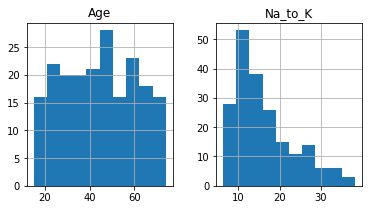

In [9]:
df.hist(figsize=(6,3));

Vamos verificar a distribuição das colunas categoricas

In [10]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [11]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [12]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [13]:
sex_drug = df.groupby(['Sex'])['Drug'].count()
sex_drug

Sex
F     96
M    104
Name: Drug, dtype: int64

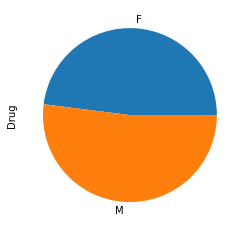

In [14]:
sex_drug.plot.pie();

(BP
 HIGH      77
 LOW       64
 NORMAL    59
 Name: Drug, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1986687510>)

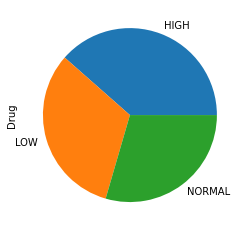

In [15]:
bp_drug = df.groupby(['BP'])['Drug'].count()
bp_drug, bp_drug.plot.pie()

(Cholesterol
 HIGH      103
 NORMAL     97
 Name: Drug, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f198665a490>)

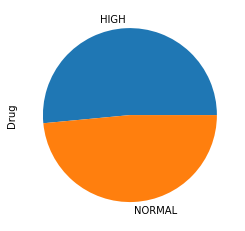

In [16]:
cholesterol_drug = df.groupby(['Cholesterol'])['Drug'].count()
cholesterol_drug, cholesterol_drug.plot.pie()

Como podemos ver há uma boa distribuição das variáveis categóricas com relação a variável dependente. Agora iremos transformar as variáveis categóricas

# Transformação dos dados

Primeiramente iremos separar os dados

In [33]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug']
x.shape, y.shape

((200, 5), (200,))

In [34]:
stiff = preprocessing.LabelEncoder()

stiff.fit(['F', 'M'])
x[:,1] = stiff.transform(x[:,1])

stiff.fit(['HIGH', 'LOW', 'NORMAL'])
x[:,2] = stiff.transform(x[:,2])

stiff.fit(['HIGH', 'NORMAL'])
x[:,3] = stiff.transform(x[:,3])

x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

# Treinando o modelo

In [35]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 5), (60, 5), (140,), (60,))

In [44]:
arvore = tree.DecisionTreeClassifier(criterion='entropy')
arvore.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Agora verificaremos qual coluna teve maior importancia para a formação de Árvore de Decisão

In [45]:
arvore.feature_importances_

array([0.09749785, 0.        , 0.3295848 , 0.05454991, 0.51836744])

Conforme os valores demonstrados acima a coluna 'Na_to_K' teve maior influência na formação da árvore

In [47]:
pred_arvore = arvore.predict(x_test)
print(f'Previsão: {pred_arvore[0:5]}')
print(f'Teste: \n{y_test[0:5]}')

Previsão: ['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
Teste: 
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# Metricas de erro

In [48]:
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, pred_arvore)}")

DecisionTrees's Accuracy: 0.9833333333333333


# Visualização

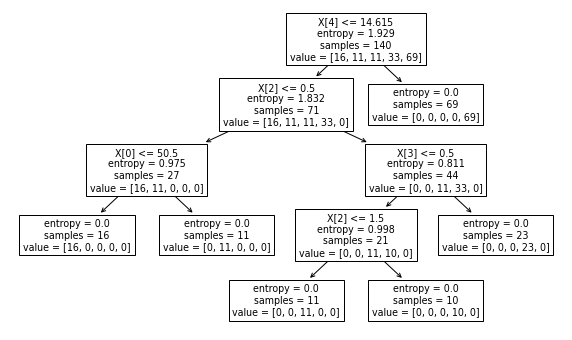

In [52]:
plt.figure(figsize=(10,6))
tree.plot_tree(arvore);